In [13]:
#Code Ouissem RADJI
#Mémoire Master 2 GRFI
#Implémentation des modèles d'apprentissage automatique pour 
#analyser les défauts de paiement des cartes bancaire 
##################code####################################
##Chargement des données et les bibliothèques requises
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv('default_of_credit_card_clients.csv')

c:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Analyse exploratoire des données 

In [14]:
#Aficher un résumé des statistiques des données 
data.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


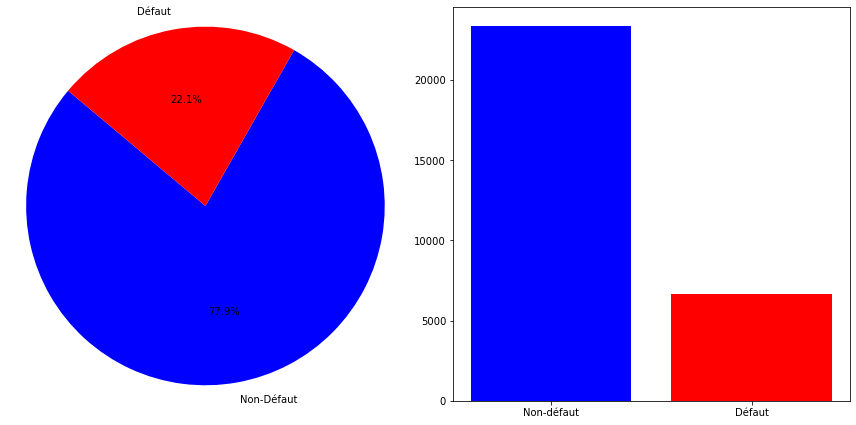

In [15]:
# Pie et hisogramme de taux des défauts et de non-défauts 
variable_cible = data.iloc[:, -1]
valeurs = variable_cible.value_counts()

# Créer une figure avec deux subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
labels = ['Non-Défaut', 'Défaut']
colors = ['blue', 'red']
valeurs_2 = [variable_cible.value_counts()[0], variable_cible.value_counts()[1]]
ax1.pie(valeurs_2, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax1.axis('equal') 

# Histogramme
categories = ['Non-défaut', 'Défaut']
valeurs = [valeurs[0], valeurs[1]]  
ax2.bar(categories, valeurs, color=['blue', 'red'])
plt.tight_layout()
plt.show()

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is c

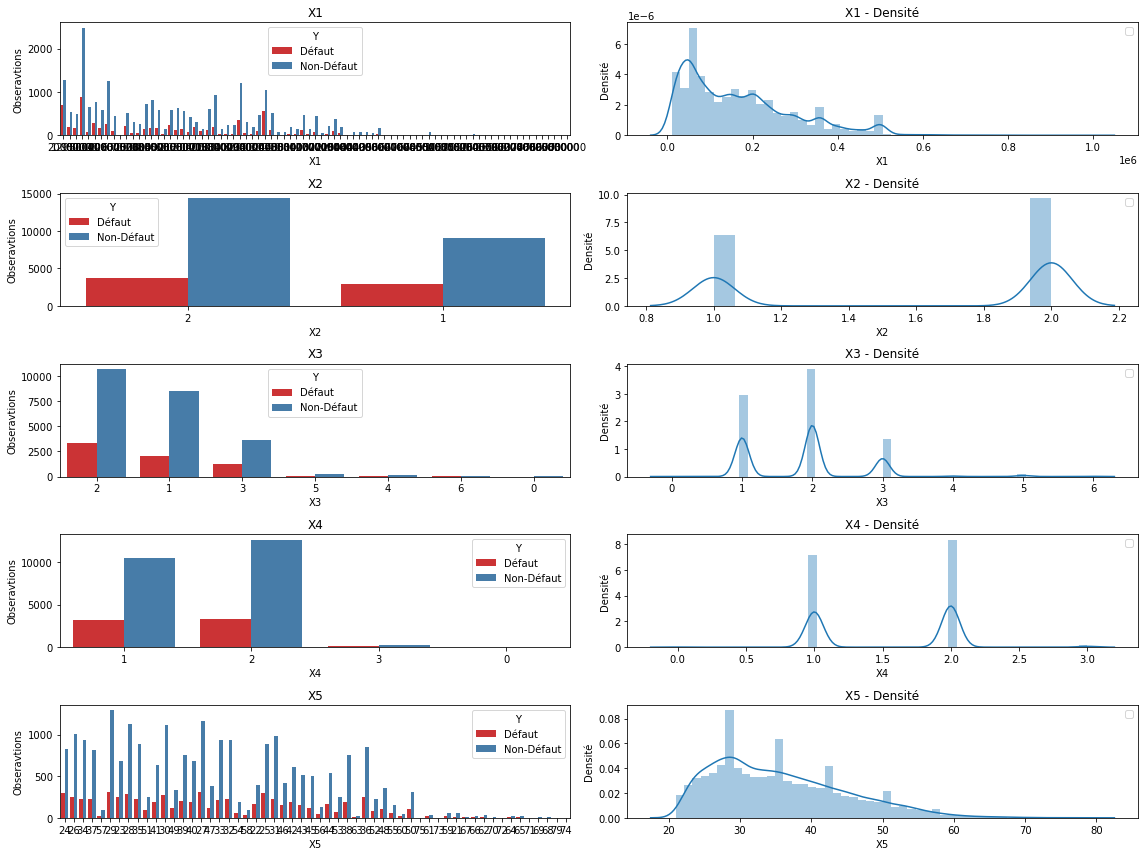

In [16]:
#recharger les données encore une fois
data_3 = pd.read_csv('./default_of_credit_card_clients.csv')
data_3 = data_3.iloc[:, 1:]
data_3 = data_3.drop(0)

#Représentation graphique des variables explicatives X1-X5 
# avec un diagramme à barre à gauche et des densité à droite en fonction de la variable cible Y 
variables_explicatives = data_3.columns[:5] 
fig, axes = plt.subplots(nrows=len(variables_explicatives), ncols=2, figsize=(16, 12))
fig.subplots_adjust(wspace=0.4)

for i, variable in enumerate(variables_explicatives):
    # Diagramme à barres à gauche
    ax_bar = axes[i, 0]
    sns.countplot(data=data_3, x=variable, hue='Y', palette='Set1', ax=ax_bar)
    ax_bar.set_title(f'{variable}')
    ax_bar.set_xlabel(variable)
    ax_bar.set_ylabel('Obseravtions')
    ax_bar.legend(title='Y', labels=['Défaut', 'Non-Défaut'])
    
    # Densité à droite avec sns.distplot
    
    ax_densite = axes[i, 1]
    sns.distplot(data_3[variable], hist=True, ax=ax_densite)
    ax_densite.set_title(f'{variable} - Densité')
    ax_densite.set_xlabel(variable)
    ax_densite.set_ylabel('Densité')
    ax_densite.legend()


plt.tight_layout()
plt.show()


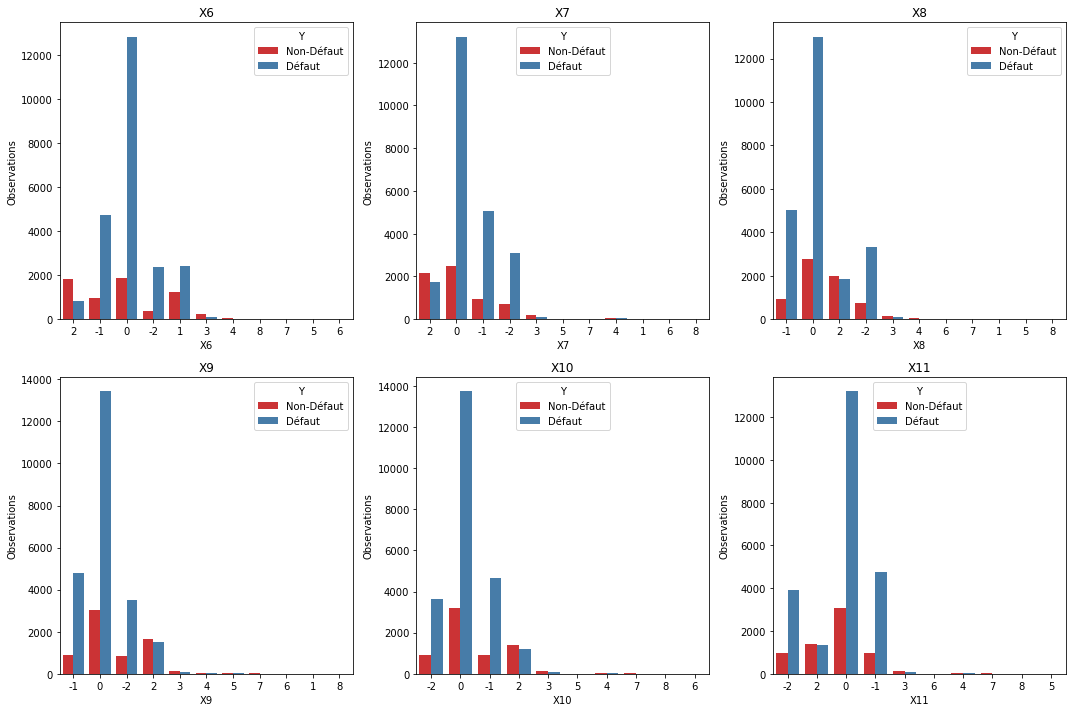

In [17]:


# Représentation des variables explicatives X6-X11 avec des diagrammes à barres en utilisant 
variables_explicatives_historiques = data_3.columns[5:11]

nbr_lignes = len(variables_explicatives_historiques) // 3 + (len(variables_explicatives_historiques) % 3  > 0)
fig, axes = plt.subplots(nbr_lignes, 3, figsize=(15, 10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
for i, var in enumerate(variables_explicatives_historiques):
    ligne = i // 3
    colonne = i % 3
    ax = axes[ligne, colonne]
    sns.countplot(data=data_3, x=var, hue='Y', palette='Set1', ax=ax)
    ax.set_title(f'{var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Observations')
    ax.legend(title='Y', labels=['Non-Défaut', 'Défaut'])

plt.tight_layout()
plt.show()

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

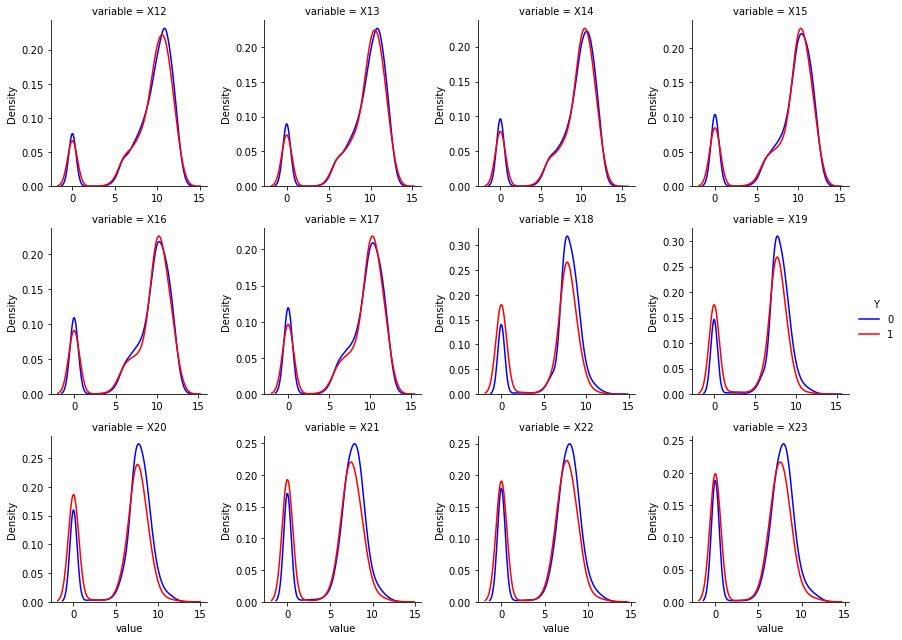

In [18]:
# les données sont données sous forme des chaines de caratères
# convertion des colones en entier en utilisant astype(int)
#Représentation graphique des distributions des vriables X12-23 en utilisant FacetGrid

colonnes_X12_X24 = data_3.columns[11:24]
data_3[colonnes_X12_X24] = data_3[colonnes_X12_X24].astype(int)
colonnes_a_transformer = data_3.columns[11:23]

# Application de la transformation logarithmique en utilisant la fonctionnalité applymap
data_3[colonnes_a_transformer] = data_3[colonnes_a_transformer].applymap(lambda x: np.log1p(x) if x > 0 else 0)

colonnes_trans = data_3.columns[11:23]
melted_data = pd.melt(data_3, id_vars='Y', value_vars=colonnes_trans)
# Personalisation des couleurs de notre figure
palette = {0: 'blue', 1: 'red'}
g = sns.FacetGrid(melted_data, hue='Y', col="variable", col_wrap=4, sharex=False, sharey=False, palette=palette)
g.map(sns.distplot, "value", kde=True, hist=False).add_legend(title="Y")

plt.show()

Implémentation des modèles d'apprentissage automatique

1-La régression logistique

In [19]:
# Imporation de train_test_split
# Imortation de LogisticRegession disponible dans sklearn
# Importation de StandarScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#Rechargement des données une autre fois 
data_3 = pd.read_csv('./default_of_credit_card_clients.csv')
data_3 = data_3.iloc[:, 1:]
data_3 = data_3.drop(0)

#Convertir les colonnes en entier
data_3=data_3[data_3.columns[0:24]].astype(int)

#Charger les variable explicatives X1-X23 dans X
X= data_3.drop(columns=['Y']).values

#Charger la variable cible Y dans y
y = data_3['Y'].values

#L standarisation des données
x = StandardScaler().fit_transform(X)

# division des données en un ensemble d'enrainement 80 % et un ensemble de test 20 %
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Création d'un objet de classe model_regression
model_regression = LogisticRegression()

#Entrainement de modèle en utilisant la fonction fit 
regreession = model_regression.fit(X_train, y_train)

#La prédiction sur l'ensemble de test 
y_pred =regreession.predict(X_test)


1.2 La matrice de confusion et la courbe ROC de la régression logistique 

[[4549  138]
 [1004  309]]


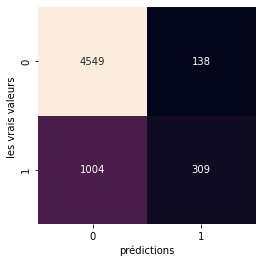

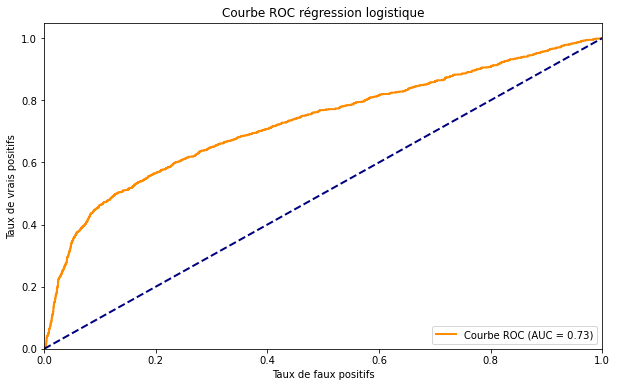

In [20]:
#la matrice de confusion de la règression logistique 
#Importation de confusion_matrix  disponible dans la classe metrics de sklearn
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt 
import seaborn as sns

#La matrice de confusion
matrice_conf_reg=confusion_matrix(y_test, y_pred)
print(matrice_conf_reg)
val = np.unique(y_pred)
sns.heatmap(matrice_conf_reg, square=True, annot=True, fmt='d', cbar=False, xticklabels=val, yticklabels=val)
plt.xlabel('prédictions')
plt.ylabel('les vrais valeurs ')

#La courbe ROC de la régression logistique
y_prob = regreession.predict_proba(X_test)[:, 1]
roc_auc_regression = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_regression:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC régression logistique')
plt.legend(loc='lower right')
plt.show()

2.Random Forest (forets aléatoires)

In [21]:
#Importation de RandomForestClassifier disponible dans sklearn
from sklearn.ensemble import RandomForestClassifier

 #Création de Random Forest avec n-estimator=100, max_depth=100, random_state=100
foret_alea = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=100)

#Entrainement de modèle en utilisant la fonction fit
model_foret_alea=foret_alea.fit(X_train, y_train)

# Prédiction en utilisnt la fonction predict
y_pred_foret_alea = model_foret_alea.predict(X_test)

2.1 La courbe ROC et la matrice de confusion de Random Forest

[[4411  276]
 [ 837  476]]


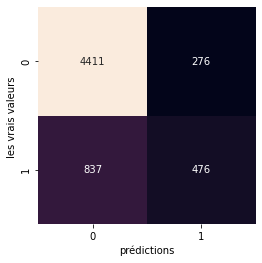

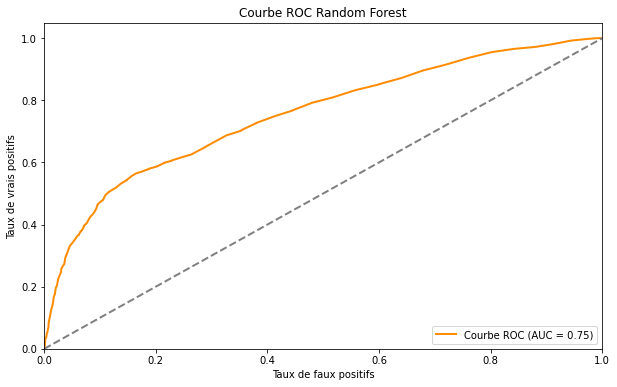

In [22]:
#La matrice de confusion
matrice_conf_foret_alea=confusion_matrix(y_test, y_pred_foret_alea)
print(matrice_conf_foret_alea)
val = np.unique(y_pred_foret_alea)

#Représentation graphique de la matrice de confusion en utilisant heatmap disponible dans sklearn
sns.heatmap(matrice_conf_foret_alea, square=True, annot=True, fmt='d', cbar=False, xticklabels=val, yticklabels=val)
plt.xlabel('prédictions')
plt.ylabel('les vrais valeurs ')

#La courbe ROC 
y_prob_foret = model_foret_alea.predict_proba(X_test)[:, 1]
roc_auc_foret = roc_auc_score(y_test, y_prob_foret)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_foret)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_foret:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC Random Forest')
plt.legend(loc='lower right')
plt.show()

2.2 L'importance des variables

In [23]:
# déterminer l'importance des varaiables explicatives en utilisant feature_importances_
col = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11","X12", "X13",
        "X14", "X15", "X16", "X17", "X18", "X19", "X20", "X21", "X22", "X23" ]
X_train_data = pd.DataFrame(X_train, columns=col)

importance_variables_explicatives=model_foret_alea.feature_importances_
trie_descendante=importance_variables_explicatives.argsort()[::-1]

for i in trie_descendante:
    print(f"{X_train_data.columns[i]}: {importance_variables_explicatives[i]}")

X6: 0.09681359947558407
X5: 0.06628049441269543
X12: 0.05999582968667417
X1: 0.059802005846649464
X13: 0.054259530764722924
X14: 0.051664729992701615
X18: 0.05130917467654125
X17: 0.050890145418424036
X15: 0.05082592605646684
X16: 0.04987455445329937
X19: 0.04763664894593669
X23: 0.04566033148899412
X20: 0.04546081435435023
X22: 0.04290066399189652
X21: 0.04279040892382808
X7: 0.04182371707182358
X8: 0.033342287126135524
X9: 0.023210261376927655
X3: 0.021010139207465167
X10: 0.019732433323746593
X11: 0.01881866485831754
X4: 0.013837087625953464
X2: 0.012060550920865694


3- L'analyse discriminante linéaire et quadratique QDA &LDA

3.1 LDA

In [24]:
#l'analyse discriminante quadratique et linéaire et quadratique 
#LDA, QDA
#Importation de LinearDiscriminantAnalysis disponible dans sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
#Entrainement de model
model_lda=lda.fit(X_train, y_train)
#Predictions
y_pred_lda=model_lda.predict(X_test)
print(y_pred_lda.shape)

(6000,)


3.2 QDA 

In [25]:
# maintenat nous allons appliquer le modèle  QDA en imporatnat QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda=QuadraticDiscriminantAnalysis()
#Entrainement
model_qda=qda.fit(X_train, y_train)
#Predictions
y_pred_qda=model_qda.predict(X_test)

3.3 La matrice de confusion LDA & QDA

[[4529  158]
 [ 988  325]]


Text(91.68, 0.5, 'les vrais valeurs ')

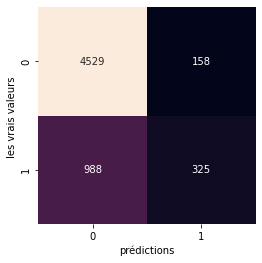

In [26]:
#la  matrice de confusion de QDA ET lda 
y_pred_lda=model_lda.predict(X_test)
matrice_conf_lda=confusion_matrix(y_test, y_pred_lda)
print(matrice_conf_lda)
val = np.unique(y_pred_lda)
sns.heatmap(matrice_conf_lda, square=True, annot=True, fmt='d', cbar=False, xticklabels=val, yticklabels=val)
plt.xlabel('prédictions')
plt.ylabel('les vrais valeurs ')

[[2009 2678]
 [ 251 1062]]


Text(91.68, 0.5, 'les vrais valeurs ')

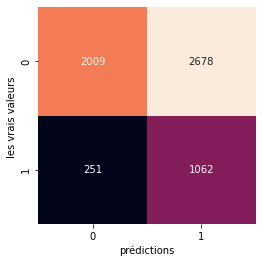

In [27]:
#la  matrice de confusion de QDA  
y_pred_qda=model_qda.predict(X_test)
matrice_conf_qda=confusion_matrix(y_test, y_pred_qda)
print(matrice_conf_qda)
val = np.unique(y_pred_qda)
sns.heatmap(matrice_conf_qda, square=True, annot=True, fmt='d', cbar=False, xticklabels=val, yticklabels=val)
plt.xlabel('prédictions')
plt.ylabel('les vrais valeurs ')

3.4 La courbe ROC de LDA & QDA

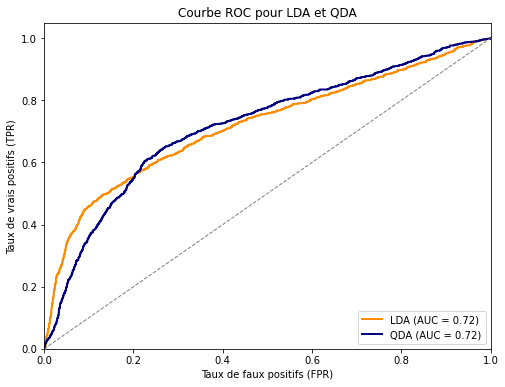

In [28]:
#Importation de roc_curve, roc_auc_scor, auc disponibles dans sklearn
from sklearn.metrics import roc_curve, roc_auc_score, auc

# La prédiction des probabilité en utilisant predit_proba
y_pred_lda = model_lda.predict_proba(X_test)[:, 1]
y_pred_qda = model_qda.predict_proba(X_test)[:, 1]

# Calculez les courbes ROC pour chaque modèle
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

fpr_qda, tpr_qda, _ = roc_curve(y_test, y_pred_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label=f'LDA (AUC = {roc_auc_lda:.2f})')
plt.plot(fpr_qda, tpr_qda, color='navy', lw=2, label=f'QDA (AUC = {roc_auc_qda:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC pour LDA et QDA')
plt.legend(loc='lower right')
plt.show()

4- K plus proches voisins (KNN)

In [29]:
#Imporatation de KNeighborsClassifie à partir de sklearn
from sklearn.neighbors import KNeighborsClassifier

k = 13
knn_classifier = KNeighborsClassifier(n_neighbors=k)
#Entrainement
model_knn= knn_classifier.fit(X_train, y_train)
#Prediction
y_pred_knn=model_knn.predict(X_test)

4.1 La matrice de confusion et la courbe ROC de KNN

[[4437  250]
 [ 888  425]]


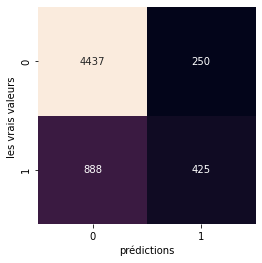

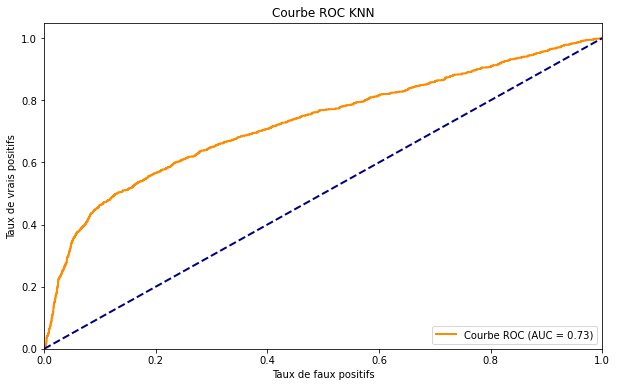

In [30]:
# La matrice de confusion de modèle KNN

confusion_knn = confusion_matrix(y_test, y_pred_knn)
print(confusion_knn)
val = np.unique(y_pred_knn)
sns.heatmap(confusion_knn, square=True, annot=True, fmt='d', cbar=False, xticklabels=val, yticklabels=val)
plt.xlabel('prédictions')
plt.ylabel('les vrais valeurs ')

#La courbe ROC de KNN
y_prob_knn = regreession.predict_proba(X_test)[:, 1]
roc_auc_KNN = roc_auc_score(y_test, y_prob_knn)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_KNN:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC KNN')
plt.legend(loc='lower right')
plt.show()

5-Machines à vecteurs de support SVM

In [31]:
#Importation de svm 
from sklearn import svm

#Nous avonsutilisé SVC car nous somme dans un cas de classification avec un noyeau linéaire
model_svm = svm.SVC(kernel='linear', probability=True)
#Entrainement
SVM=model_svm.fit(X_train, y_train)
#Predictions
y_pred_svm=model_svm.predict(X_test)

5.1 La matrice de confusion et la courbe ROC de SVM

[[4560  127]
 [1010  303]]


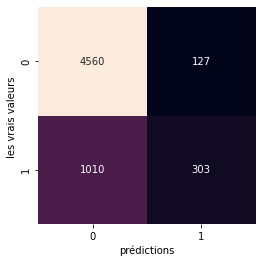

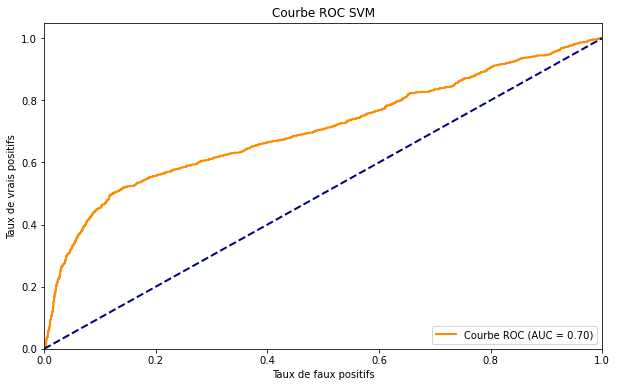

In [32]:
#La matrice de confusion
confusion_svm = confusion_matrix(y_test, y_pred_svm)
print(confusion_svm)
val = np.unique(y_pred_svm)
sns.heatmap(confusion_svm, square=True, annot=True, fmt='d', cbar=False, xticklabels=val, yticklabels=val)
plt.xlabel('prédictions')
plt.ylabel('les vrais valeurs ')

#La courbe ROC 
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC SVM')
plt.legend(loc='lower right')
plt.show()

6 Autres métriques de performanace des modèles précédends 

In [35]:
# Comparaison des résultats 
from sklearn.metrics import accuracy_score, classification_report

print('résultats des forets aléatoires')
classifi_foret_alea = classification_report(y_test,y_pred_foret_alea )
print(classifi_foret_alea)

print('résuktats de la régression logistique')
classifi_reg=classification_report(y_test, y_pred)
print(classifi_reg)

print('résultats de la clasification KNN')
classifi_KNN=classification_report(y_test, y_pred_knn)
print(classifi_KNN)

# print('Résultats QDA')
# classifi_QDA=classification_report(y_test, y_pred_qda)
# print(classifi_QDA)

# print('Résultats LDA')
# classifi_LDA=classification_report(y_test, y_pred_lda)
# print(classifi_LDA)

# print('Résultats SVM')
# classifi_SVM=classification_report(y_test, y_pred_svm)
# print(classifi_SVM)

résultats des forets aléatoires
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000

résuktats de la régression logistique
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

résultats de la clasification KNN
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.63      0.32      0.43      1313

    accuracy                           0.81      6000
   macro avg       0.73 

6.1 La comparaison de la précision des modèles sur l'ensemble de test pour la classe 1 

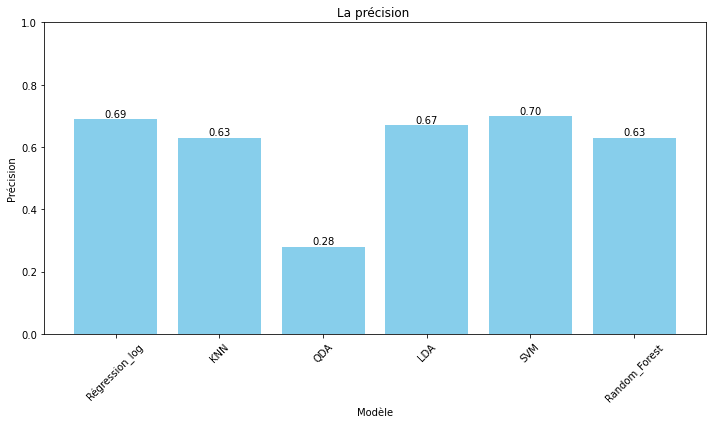

In [34]:
# Création d'un data frame des précision des différents modèles 
#Représentation graphique avec des barres l'évolution de la précision
# des modèles utilisés dans cette étude
data = {
    'Modèle': ['Régression_log', 'KNN', 'QDA', 'LDA', 'SVM', 'Random_Forest'],
    'Précision': [0.69, 0.63, 0.28, 0.67, 0.70, 0.63] }

data_precision = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
plt.bar(data_precision['Modèle'], data_precision['Précision'], color='skyblue')
plt.xlabel('Modèle')
plt.ylabel('Précision')
plt.title('La précision ')
plt.ylim(0, 1) 

for indice, ligne in data_precision.iterrows():
    plt.text(indice, ligne['Précision'], f"{ligne['Précision']:.2f}", ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()